# Tutorial 7 - Intro to GNNs



- You will implement and train a basic GNN  to do vertex classification on the Cora dataset.
- You will implement  **your own** GraphSAGE (with mean/sum/max aggregation) message passing scheme as the core mechanism of your GNN.


## Please visit [this github page](https://github.com/sw-gong/GNN-Tutorial/blob/master/GNN-tutorial-solution.ipynb) for the solutions.

## Setting up working environment



In [ ]:
!pip install torch torchvision
!pip install torch-scatter torch-sparse torch-geometric

## Pytorch Geometric Framework

#### Generic Message Passing Scheme
Generalizing the convolution operator to irregular domains is typically expressed as a *neighborhood aggregation* or *message passing* scheme.
With $\mathbf{x}^{(k-1)}_i \in \mathbb{R}^F$ denoting node features of node $i$ in layer $(k-1)$ and $\mathbf{e}_{i,j} \in \mathbb{R}^D$ denoting (optional) edge features from node $i$ to node $j$, message passing graph neural networks can be described as

$$
  \mathbf{x}_i^{(k)} = \gamma^{(k)} \left( \mathbf{x}_i^{(k-1)}, \square_{j \in \mathcal{N}(i)} \, \phi^{(k)}\left(\mathbf{x}_i^{(k-1)}, \mathbf{x}_j^{(k-1)},\mathbf{e}_{i,j}\right) \right)
$$

where $\square$ denotes a differentiable, permutation invariant function, *e.g.*, sum, mean or max, and $\gamma$ and $\phi$ denote differentiable functions such as MLPs (Multi Layer Perceptrons).

#### Graph data representations in PyG
Given a *sparse* **Graph** $\mathcal{G}=(\mathbf{X}, (\mathbf{I}, \mathbf{E}))$ with **node features** $\mathbf{X} \in \mathbb{R}^{|V| \times F}$, **edge indices $\mathbf{I} \in \{1, \cdots, N\}^{2 \times |\mathcal{E}|}$**, (optional) **edge features** $\mathbf{E} \in \mathbb{R}^{|\mathcal{E} \times D|}$, it is described by an instance of class `torch_geometric.data.Data`, which holds the corresponding attributes.


In [ ]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[1, 2, 3], [0, 0, 0]], dtype=torch.long)
x = torch.tensor([[1], [1], [1]], dtype=torch.float)

data = Data(edge_index=edge_index, x=x)
data

#### Abstract Message Passing Scheme in PyG

PyTorch Geometric provides the `torch_geometric.nn.MessagePassing` base class, which helps in creating such kinds of message passing graph neural networks by automatically taking care of message propagation. The implementation is decoupled into **UPDATE**, **AGGREGATION**, **MESSAGE** functions as:
$$
    \mathbf{x}_i^{(k)} = \mathrm{UPDATE} \left( \mathbf{x}_i^{(k-1)},  \mathrm{AGGR}_{j \in \mathcal{N}(i)} \, \mathrm{MESSAGE}^{(k)}\left(\mathbf{x}_i^{(k-1)}, \mathbf{x}_j^{(k-1)},\mathbf{e}_{i,j}\right) \right)    
$$

#### Implementing GraphSAGE

The algorithm of GraphSAGE (*Inductive Representation Learning on Large Graphs (NIPS 2017)* embedding generation is described as:

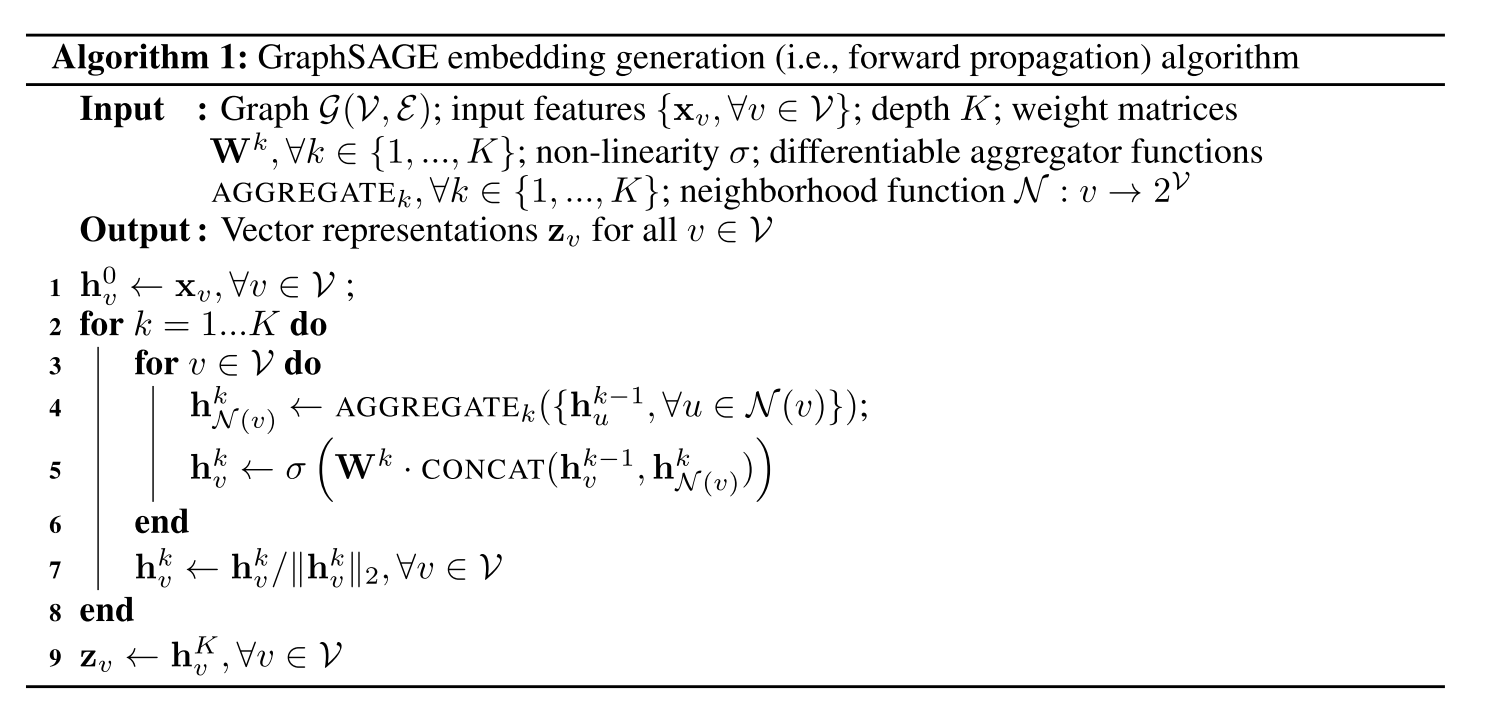


You are required to implement this algortihm with **MEAN/SUM/MAX** AGGREGATE.

In [ ]:
import math
import torch
import torch.nn.functional as F
from torch.nn import Parameter
from torch_geometric.nn.conv import MessagePassing

def uniform(size, tensor):
    bound = 1.0 / math.sqrt(size)
    if tensor is not None:
        tensor.data.uniform_(-bound, bound)


class SAGEConv(MessagePassing):
    def __init__(self, in_channels, out_channels, aggr):
        super(SAGEConv, self).__init__(aggr=aggr)

        self.in_channels = in_channels
        self.out_channels = out_channels

        self.weight = Parameter(torch.Tensor(2 * in_channels, out_channels))

        self.reset_parameters()

    def reset_parameters(self):
        uniform(self.weight.size(0), self.weight)

    def forward(self, x, edge_index):

        ########################################################################
        #      START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)             #
        ########################################################################
        pass

        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################



    def message(self, x_j, edge_weight):

        ########################################################################
        #      START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)             #
        ########################################################################
        pass

        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################



    def update(self, aggr_out, x):

        ########################################################################
        #      START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)             #
        ########################################################################
        pass

        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################



## Vertex Classification

The Cora dataset consists of 2708 scientific publications classified into one of seven classes. The citation network consists of 5429 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary.

In [ ]:
import os
import os.path as osp
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T

path = osp.join(os.getcwd(), 'data', 'Cora')
dataset = Planetoid(path, 'Cora')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class SAGENet(torch.nn.Module):
    def __init__(self, dataset, aggr='mean'):
        super(SAGENet, self).__init__()

        ########################################################################
        #      START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)             #
        ########################################################################
        pass


        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

        self.reset_parameters()


    def reset_parameters(self):
        self.conv1.reset_parameters()
        self.conv2.reset_parameters()

    def forward(self, data):

        ########################################################################
        #      START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)             #
        ########################################################################
        pass

        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

# Train your network

In [ ]:
import time

from torch import tensor
from torch.optim import Adam

def run(dataset, model, runs, epochs, lr, weight_decay, early_stopping):

    val_losses, accs, durations = [], [], []
    for _ in range(runs):
        data = dataset[0]
        data = data.to(device)

        model.to(device).reset_parameters()
        optimizer = Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

        if torch.cuda.is_available():
            torch.cuda.synchronize()

        t_start = time.perf_counter()

        best_val_loss = float('inf')
        test_acc = 0
        val_loss_history = []

        for epoch in range(1, epochs + 1):
            train(model, optimizer, data)
            eval_info = evaluate(model, data)
            eval_info['epoch'] = epoch

            if eval_info['val_loss'] < best_val_loss:
                best_val_loss = eval_info['val_loss']
                test_acc = eval_info['test_acc']

            val_loss_history.append(eval_info['val_loss'])
            if early_stopping > 0 and epoch > epochs // 2:
                tmp = tensor(val_loss_history[-(early_stopping + 1):-1])
                if eval_info['val_loss'] > tmp.mean().item():
                    break

        if torch.cuda.is_available():
            torch.cuda.synchronize()

        t_end = time.perf_counter()

        val_losses.append(best_val_loss)
        accs.append(test_acc)
        durations.append(t_end - t_start)

    loss, acc, duration = tensor(val_losses), tensor(accs), tensor(durations)

    print('Val Loss: {:.4f}, Test Accuracy: {:.3f} ± {:.3f}, Duration: {:.3f}'.
          format(loss.mean().item(),
                 acc.mean().item(),
                 acc.std().item(),
                 duration.mean().item()))


def train(model, optimizer, data):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()


def evaluate(model, data):
    model.eval()

    with torch.no_grad():
        logits = model(data)

    outs = {}
    for key in ['train', 'val', 'test']:
        mask = data['{}_mask'.format(key)]
        loss = F.nll_loss(logits[mask], data.y[mask]).item()
        pred = logits[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()

        outs['{}_loss'.format(key)] = loss
        outs['{}_acc'.format(key)] = acc

    return outs

In [ ]:
aggrs = ['mean', 'add', 'max']

for aggr in aggrs:
    print('GraphSAGE-{}'.format(aggr))
    run(dataset, SAGENet(dataset, aggr), runs, epochs, lr, weight_decay,
        early_stopping)